In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sy
from datetime import datetime as dt 

from scipy.optimize import curve_fit

import pandas as pd  # data parsing library
from matplotlib import cm, colors

from glob import glob

from scipy.stats.stats import pearsonr

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Display all data

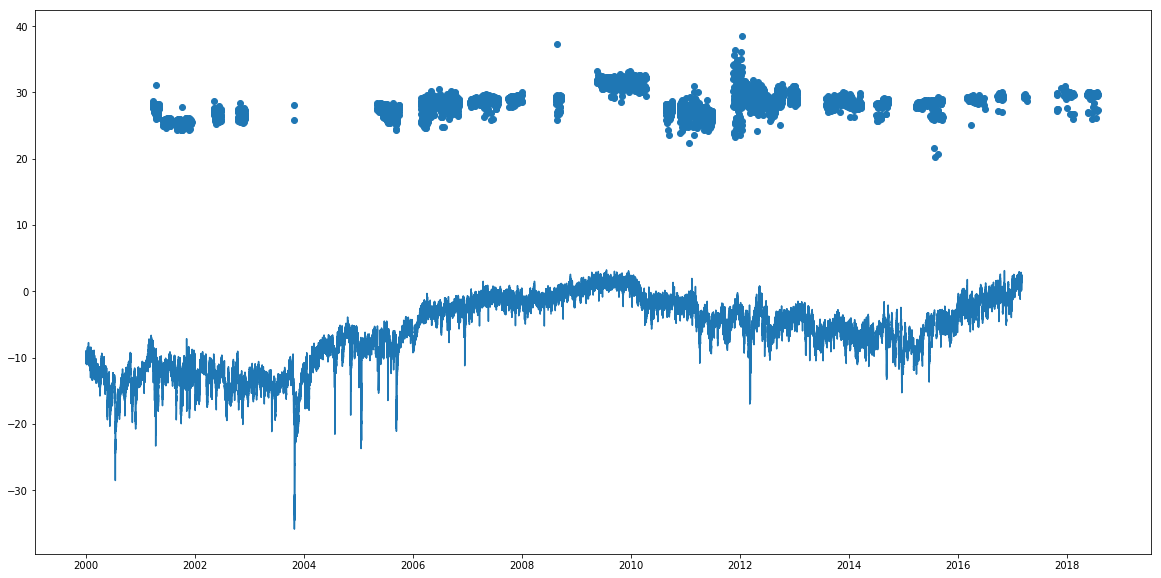

In [2]:
plt.figure(figsize=(20, 10))

df3 = pd.read_csv('./radiation_avg.csv', sep=',', header=0)#, parse_dates='time' 
df3['date'] = pd.to_datetime(df3['date'])
df3 = df3.set_index('date')
df3 = df3.sort_index()

df4 = pd.read_csv('./LSradiation.csv', sep=',', header=0)#, parse_dates='time')
df4['time'] = pd.to_datetime(df4['time'])
df4 = df4.set_index('time')
df4 = df4.sort_index()

plt.plot(df4.index,df4['FD']-100)
plt.scatter(df3.index,df3['count']*10)


# Display CR10 style data

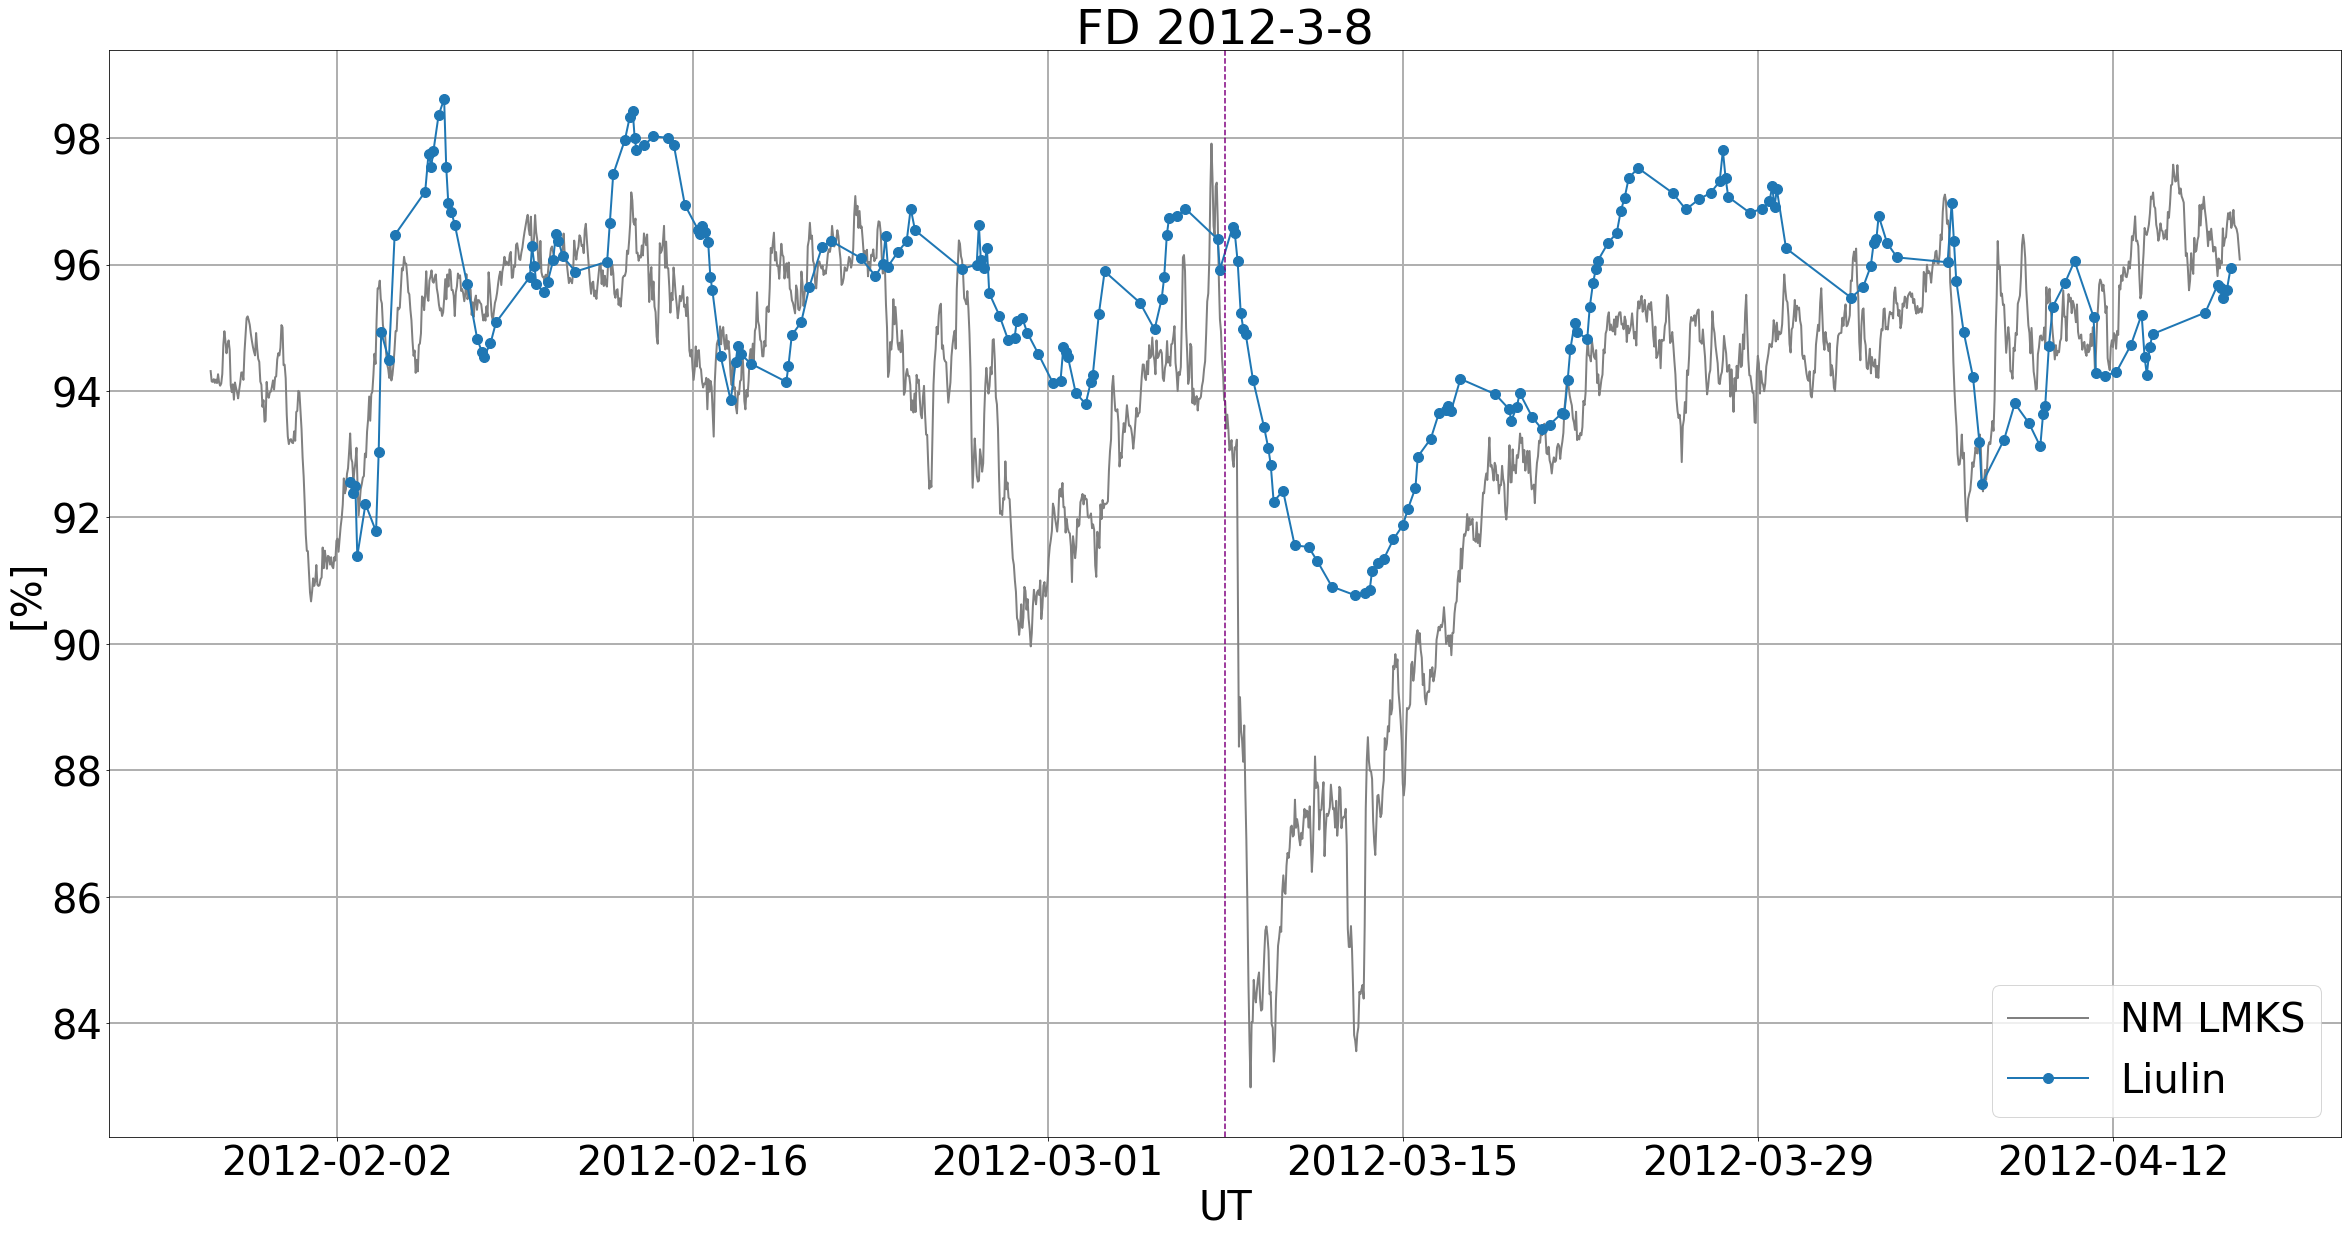

In [16]:
FD = '2001-4-12'
#FD = '2012-9-4'
#FD = '2007-6-22'
#FD = '2008-8-22'
#FD = '2005-9-10'
FD = '2012-3-8'

days_view = 40

#plt.figure(figsize=(20, 10))
plt.figure(figsize=(40, 20))
matplotlib.rcParams.update({'font.size': 40})

df3 = pd.read_csv('./LSradiation.csv', sep=',', header=0)#, parse_dates='time')
df3['time'] = pd.to_datetime(df3['time'])
df3 = df3.set_index('time')
df3 = df3.sort_index()

df2 = pd.read_csv('./radiation_avg.csv', sep=',', header=0)#, parse_dates='time' )
df2['date'] = pd.to_datetime(df2['date'])
df2 = df2.set_index('date')

#df2 = df2.loc[df2['counter']>30] # filter for short flights

datetime.timedelta(days=1)
from_time = str(pd.to_datetime(FD) + datetime.timedelta(days=-days_view))
to_time = str(pd.to_datetime(FD) + datetime.timedelta(days=days_view))

df2['c'] = df2['count'] / (3.1/100)
df2 = df2.loc[df2['c']<110]

#df2 = df2.resample('24 H', how='median', base=0)
WINDOW = 10
df2['c'] = df2['c'].rolling(WINDOW).mean()

# Neutron monitor
# The percentages are normalized to 100 % level reached in September 1986 and represented 1,745.200 counts per hour. 
plt.plot(df3[from_time: to_time].index,df3[from_time: to_time]['FD'],lw='2',color='grey',label='NM LMKS')
plt.title('FD ' + FD) 

#plt.twinx()

plt.plot(df2[from_time: to_time].index,df2[from_time: to_time]['c'], lw='2',marker='.', markersize=20,label='Liulin')
#!!! plt.plot(df2[from_time: to_time].index,df2[from_time: to_time]['c'],lw='1', markersize=20,marker='.',linestyle=':',label='Liulin')
#plt.ylim(1.5,3.2)
#plt.annotate('s', (matplotlib.dates.date2num(df2[from_time: to_time].index.to_pydatetime()), df2[from_time: to_time]['c'].tolist()))

plt.axvline(x=pd.to_datetime(FD), color='purple', ls='--') # plot dashed vertical line at the FD time

plt.ylabel('[%]') # Y axis label
plt.xlabel('UT') # X axis label
plt.legend(loc=4)
plt.grid(lw='2')


# Plot map

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:26: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()


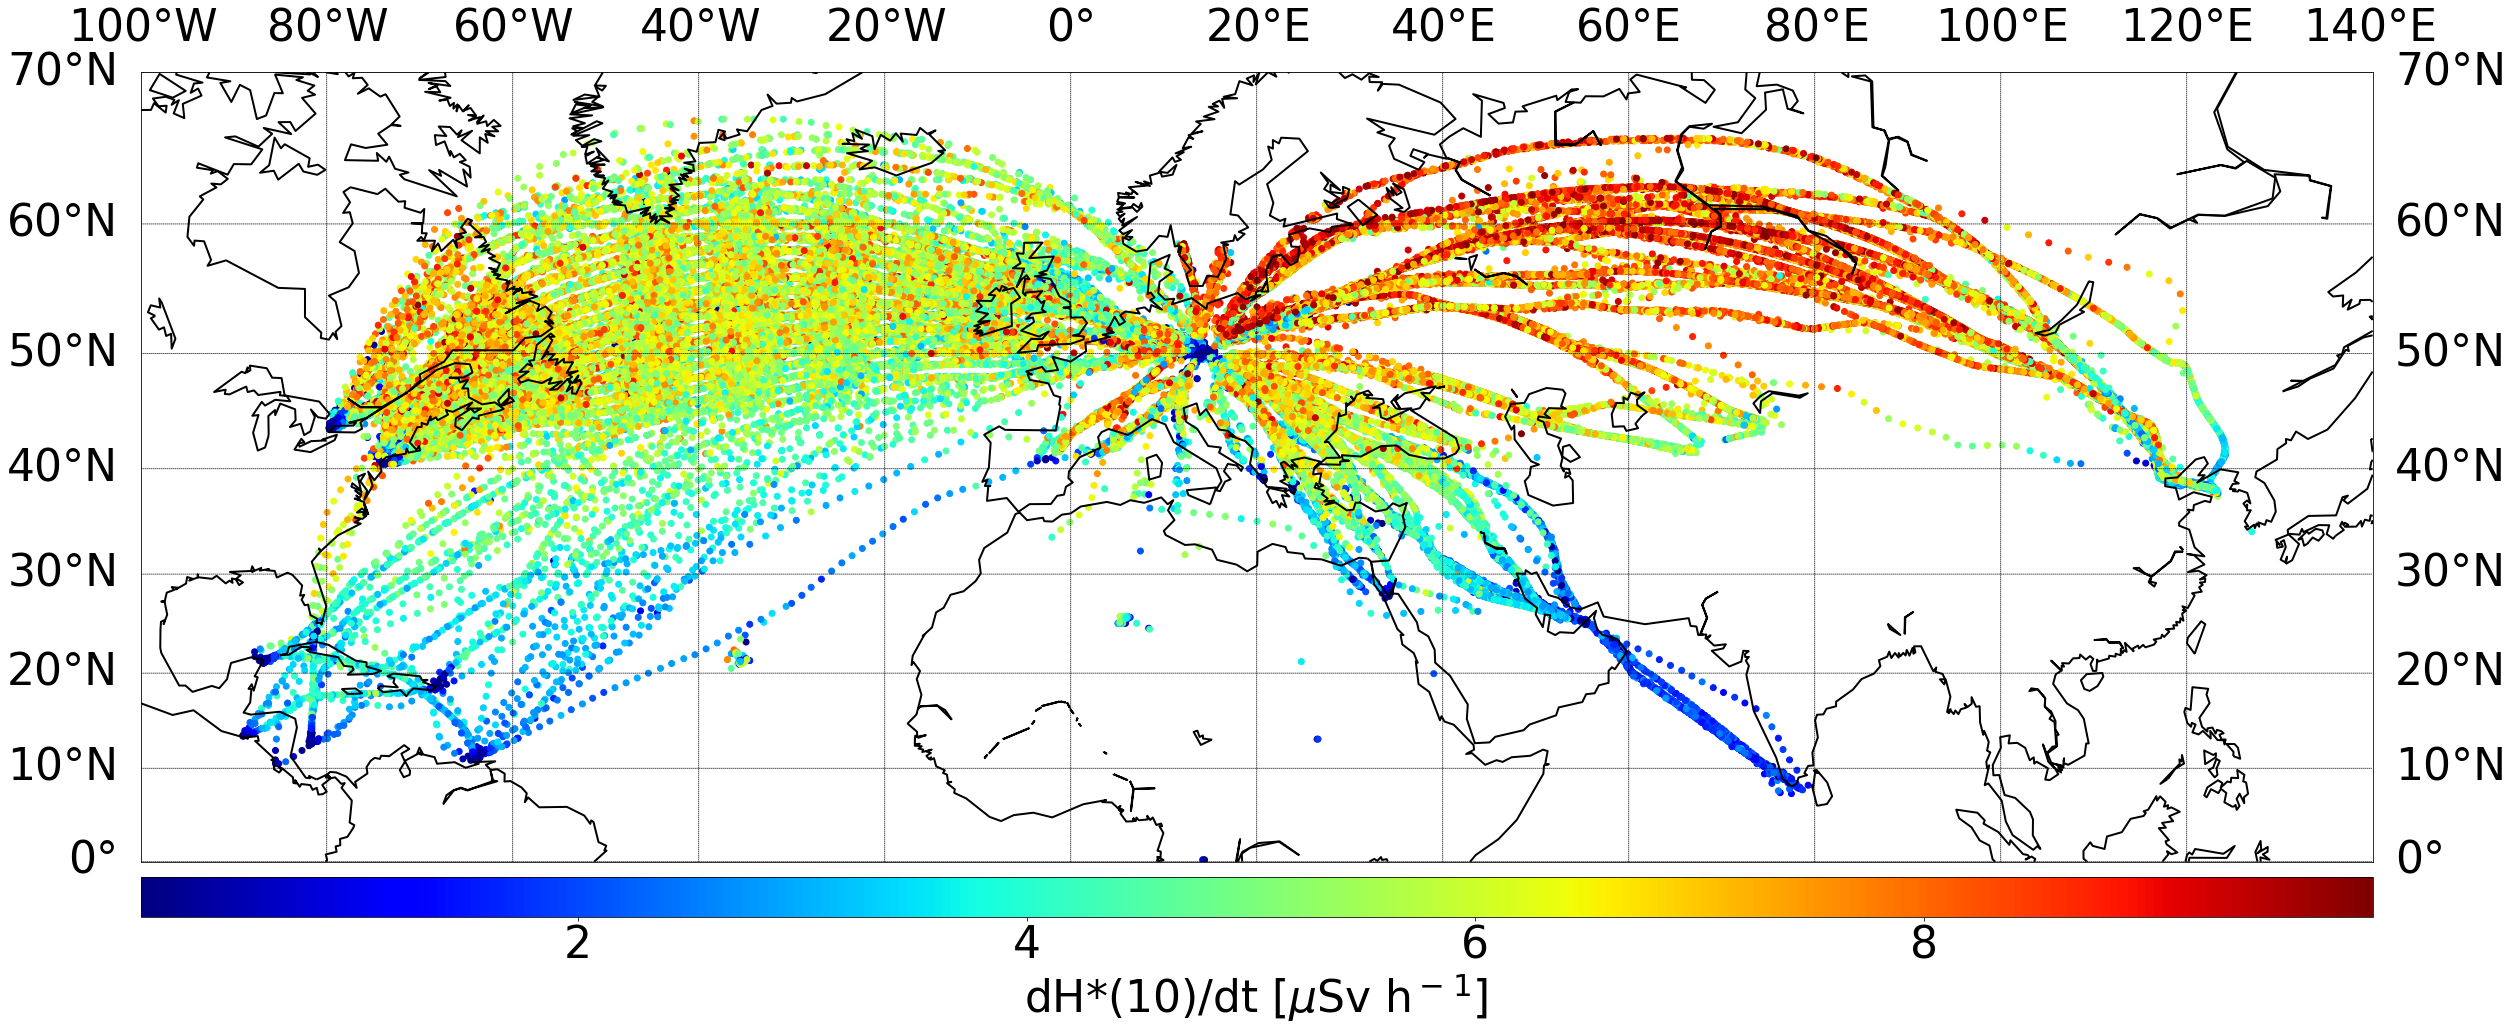

In [34]:
import time, calendar, datetime, numpy
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import urllib, os

def createColourbar(lwr, upr):
    """Create a colourbar with limits of lwr and upr"""
    cax, kw = matplotlib.colorbar.make_axes(mp.gca())
    norm = matplotlib.colors.Normalize(vmin = lwr, vmax = upr, clip = False)

    c = matplotlib.colorbar.ColorbarBase(cax, cmap=mp.spectral(), norm=norm)
    return c

plt.figure(figsize=(40,40))
matplotlib.rcParams.update({'font.size': 44})

# World map
m = Basemap(llcrnrlon=-100,llcrnrlat=0,urcrnrlon=140,urcrnrlat=70,projection='mill')

filename = './output/AllRun.txt'

df = pd.read_csv(filename,delimiter='\t', header=0, usecols=['date','lat','lon','alt','H'])
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

df = df.resample('10 min', how='mean', base=0)
df.dropna(inplace=True)
df = df.loc[df['H']<10].loc[df['H']>0]
#df = df.loc['2010':'2011']
#df = df.loc['2010-07-01':'2011-07-01']
#df = df.loc[df['lat']<5].loc[df['lat']>0]
#df = df.loc[df['lon']<20].loc[df['lon']>0]
#df = df.loc[df['alt']>35000].loc[df['alt']<36000]

x, y = m(df['lon'].tolist(),df['lat'].tolist())

m.drawcoastlines(linewidth=2)
#m.drawmapboundary(fill_color='#99ffff')
#m.fillcontinents(color='#cc9966',lake_color='#99ffff',zorder=0)
m.drawparallels(np.arange(-90.,99.,10.),labels=[1,1,0,0])
m.drawmeridians(np.arange(-180.,180.,20.),labels=[0,0,1,0])
#im1 = m.scatter(x,y,c=df['H'].tolist(),s=20,marker='o', linewidth='0', cmap='jet')
im1 = m.scatter(x,y,c=df['H'].tolist(), cmap='jet')

cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
cb.set_label(r'dH*(10)/dt [$\mu$Sv h$^-$$^1$]')
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:26: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()


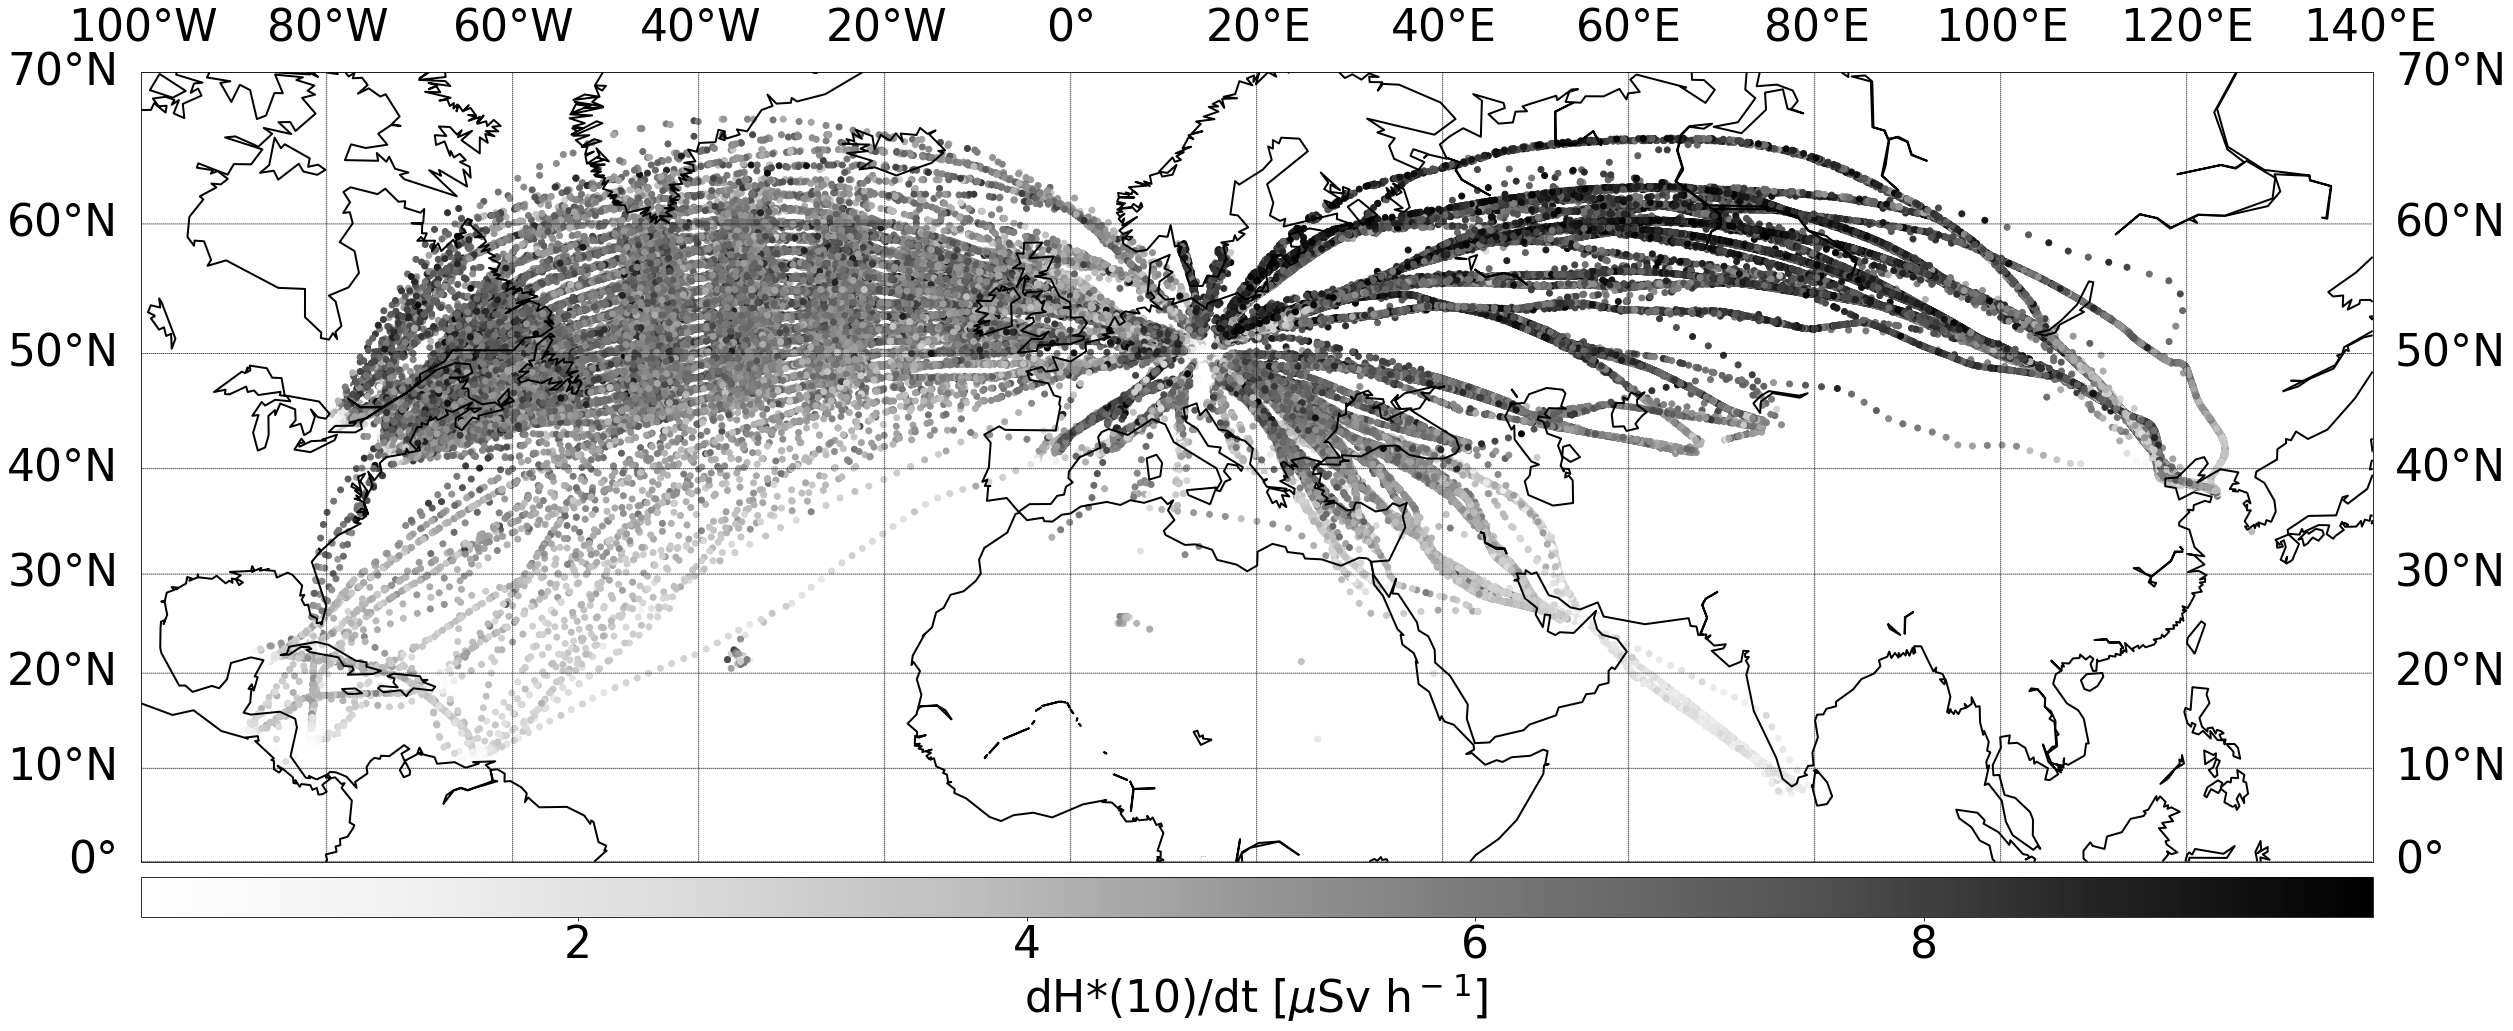

In [35]:
import time, calendar, datetime, numpy
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import urllib, os

def createColourbar(lwr, upr):
    """Create a colourbar with limits of lwr and upr"""
    cax, kw = matplotlib.colorbar.make_axes(mp.gca())
    norm = matplotlib.colors.Normalize(vmin = lwr, vmax = upr, clip = False)

    c = matplotlib.colorbar.ColorbarBase(cax, cmap=mp.spectral(), norm=norm)
    return c

plt.figure(figsize=(40,40))
matplotlib.rcParams.update({'font.size': 44})

# World map
m = Basemap(llcrnrlon=-100,llcrnrlat=0,urcrnrlon=140,urcrnrlat=70,projection='mill')

filename = './output/AllRun.txt'

df = pd.read_csv(filename,delimiter='\t', header=0, usecols=['date','lat','lon','alt','H'])
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

df = df.resample('10 min', how='mean', base=0)
df.dropna(inplace=True)
df = df.loc[df['H']<10].loc[df['H']>0]
#df = df.loc['2010':'2011']
#df = df.loc['2010-07-01':'2011-07-01']
#df = df.loc[df['lat']<5].loc[df['lat']>0]
#df = df.loc[df['lon']<20].loc[df['lon']>0]
#df = df.loc[df['alt']>35000].loc[df['alt']<36000]

x, y = m(df['lon'].tolist(),df['lat'].tolist())

m.drawcoastlines(linewidth=2)
#m.drawmapboundary(fill_color='#99ffff')
#m.fillcontinents(color='#cc9966',lake_color='#99ffff',zorder=0)
m.drawparallels(np.arange(-90.,99.,10.),labels=[1,1,0,0])
m.drawmeridians(np.arange(-180.,180.,20.),labels=[0,0,1,0])
#im1 = m.scatter(x,y,c=df['H'].tolist(),s=20,marker='o', linewidth='0', cmap='jet')
im1 = m.scatter(x,y,c=df['H'].tolist(), cmap='Greys')

cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
cb.set_label(r'dH*(10)/dt [$\mu$Sv h$^-$$^1$]')
plt.show()

Text(0.5,0,'Altitude [ft]')

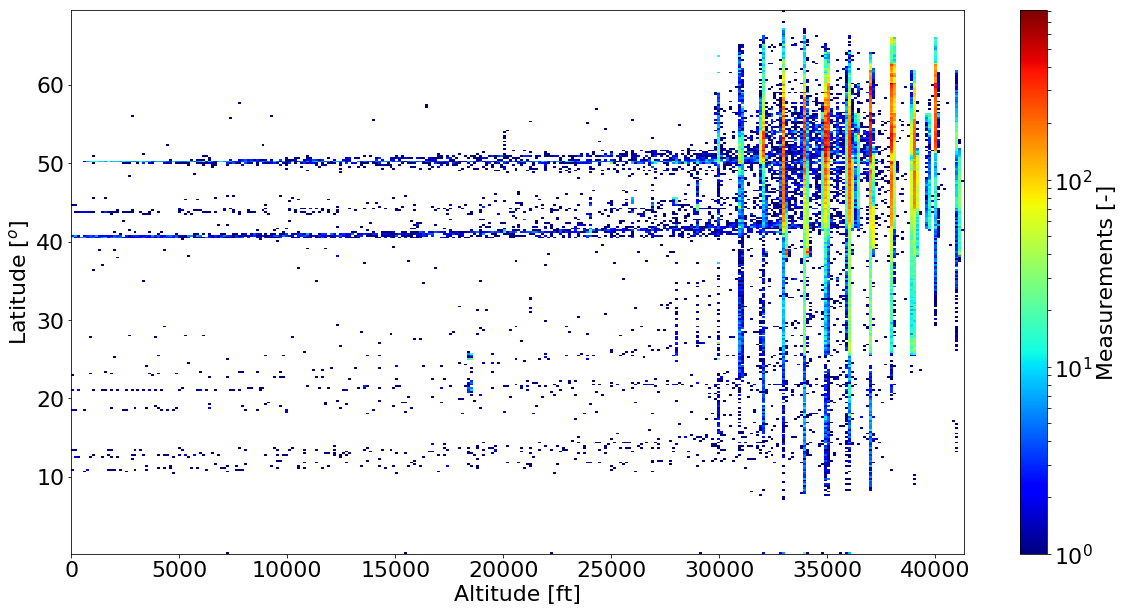

In [9]:
plt.figure(figsize=(20, 10))
matplotlib.rcParams.update({'font.size': 22})

df = pd.read_csv('./output/AllRun.txt',delimiter='\t', header=0, usecols=['date','lat','lon','alt','H'])
#df = df.loc[df['alt']>39000].loc[df['alt']<40000]

plt.hist2d(df['alt'], df['lat'], bins=(300,300), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
cb = plt.colorbar()
cb.set_label('Measurements [-]')
plt.ylabel(r'Latitude [$^o$]') # Y axis label
plt.xlabel('Altitude [ft]') # X axis label


In [306]:
#df2.loc['2010-07-01':'2011-07-01']['count']*(1)

<Figure size 1440x720 with 0 Axes>

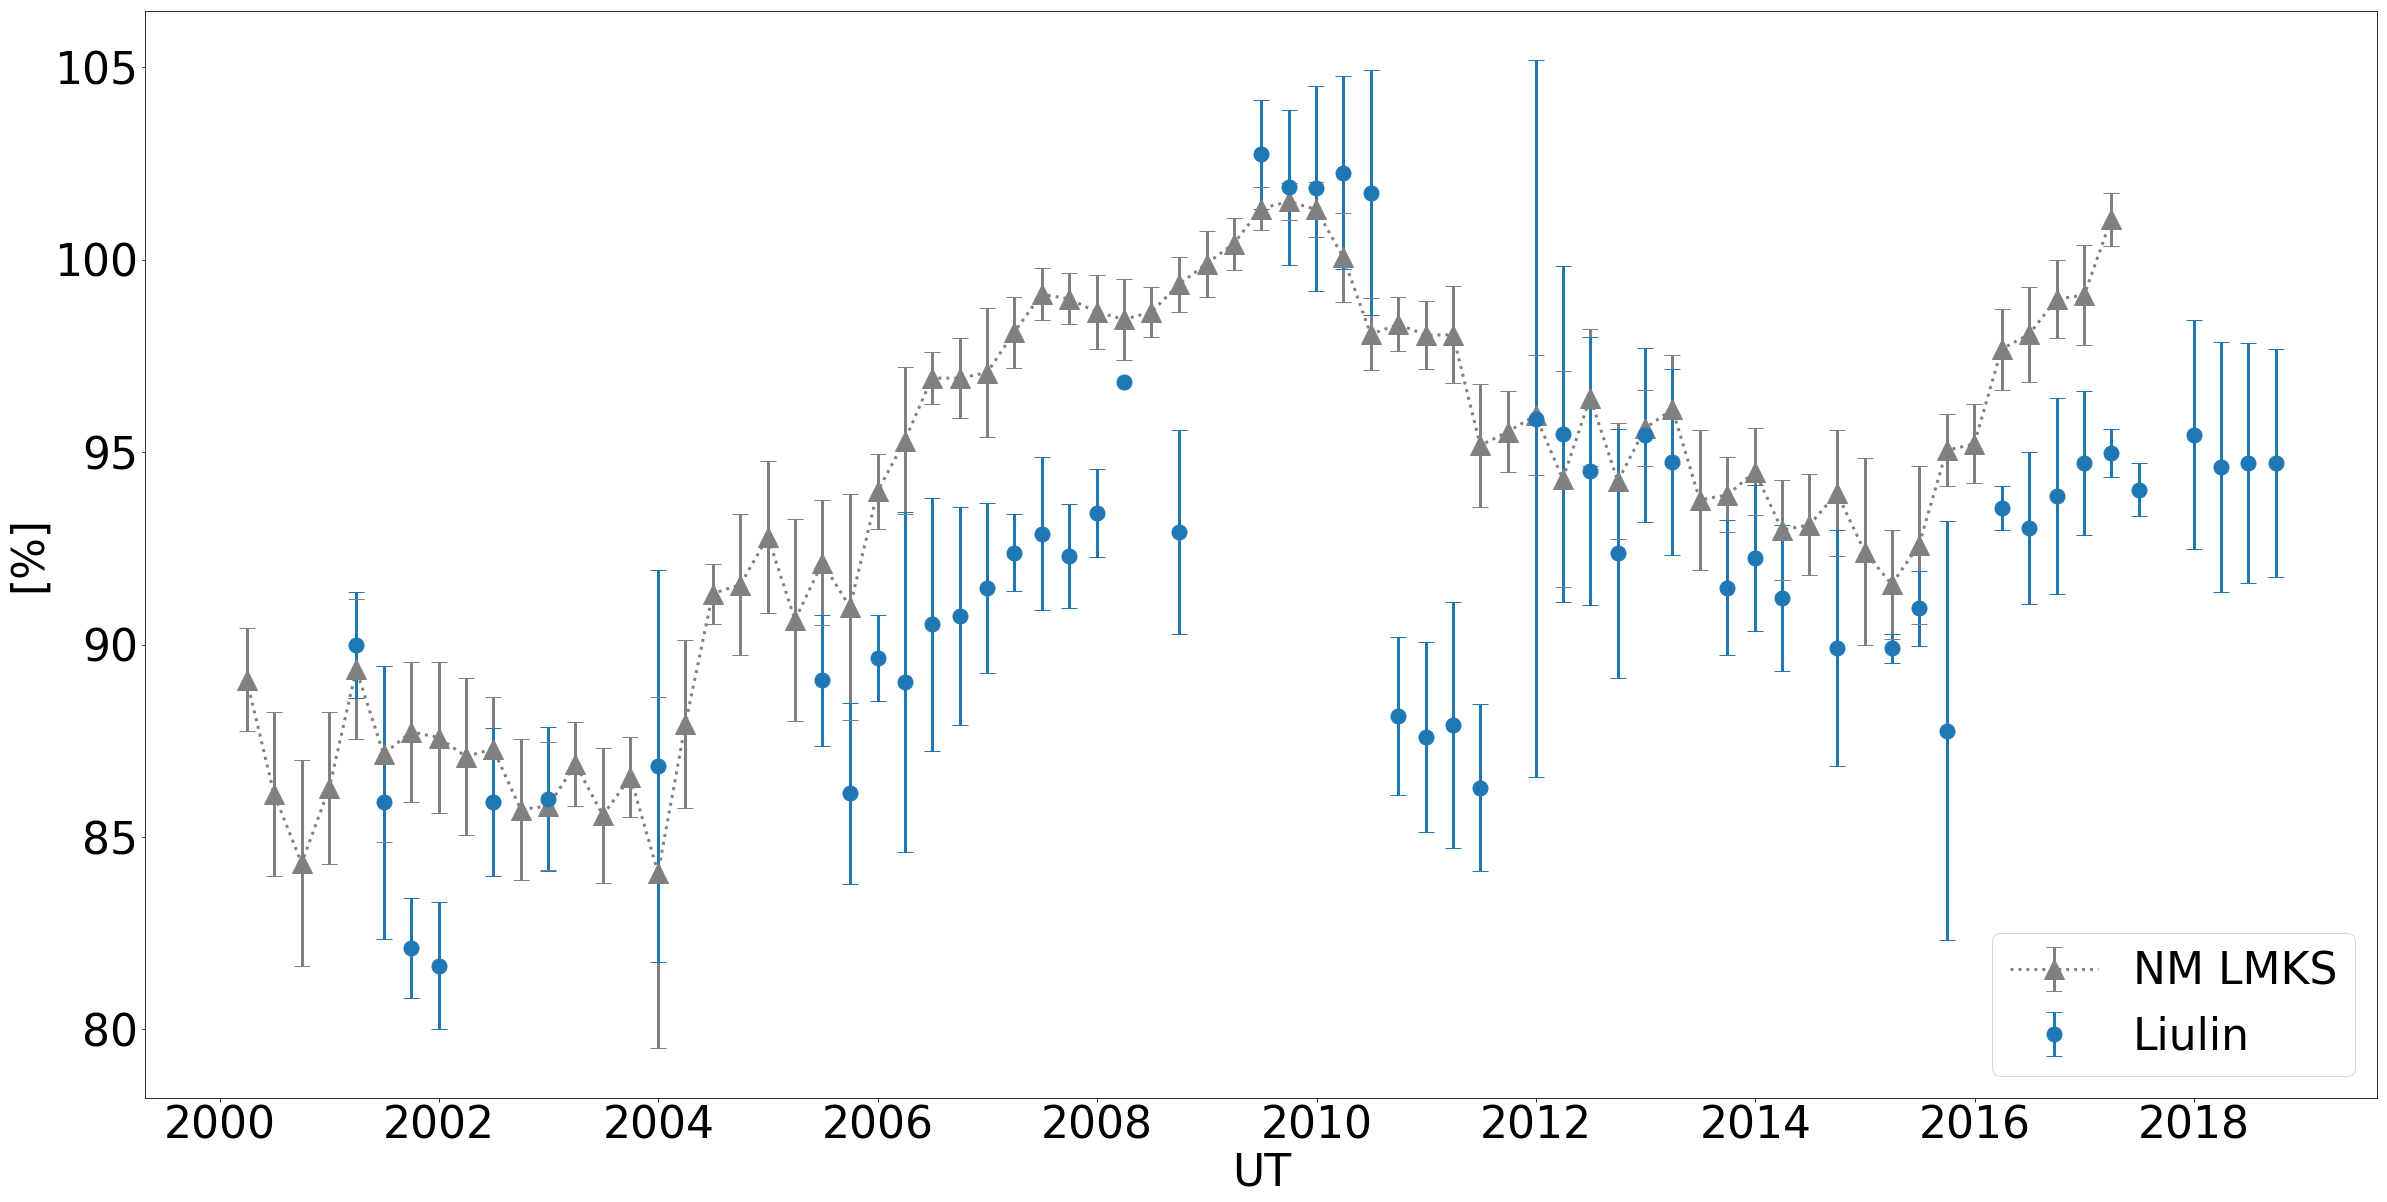

In [25]:
'''
B   business day frequency
C   custom business day frequency (experimental)
D   calendar day frequency
W   weekly frequency
M   month end frequency
BM  business month end frequency
MS  month start frequency
BMS business month start frequency
Q   quarter end frequency
BQ  business quarter endfrequency
QS  quarter start frequency
BQS business quarter start frequency
A   year end frequency
BA  business year end frequency
AS  year start frequency
BAS business year start frequency
H   hourly frequency
T   minutely frequency
S   secondly frequency
L   milliseconds
U   microseconds
'''

plt.figure(figsize=(20, 10))
matplotlib.rcParams.update({'font.size': 22})

FD = '2001-4-12'
#FD = '2012-9-4'
#FD = '2007-6-22'
#FD = '2008-8-22'
#FD = '2005-9-10'
#FD = '2015-8-4'

days_view = 20000

plt.figure(figsize=(40, 20))
matplotlib.rcParams.update({'font.size': 44})

df3 = pd.read_csv('./LSradiation.csv', sep=',', header=0, parse_dates=['time'])
df3['time'] = pd.to_datetime(df3['time'])
df3 = df3.set_index('time')
df3 = df3.sort_index()

df2 = pd.read_csv('./radiation_avg.csv', sep=',', header=0, parse_dates=['date'] )
df2['date'] = pd.to_datetime(df2['date'])
df2 = df2.set_index('date')

#df2 = df2.loc[df2['counter']>30] # filter for long flights

datetime.timedelta(days=1)
from_time = str(pd.to_datetime(FD) + datetime.timedelta(days=-days_view))
to_time = str(pd.to_datetime(FD) + datetime.timedelta(days=days_view))

# Neutron monitor
# The percentages are normalized to 100 % level reached in September 1986 and represented 1,745.200 counts per hour. 
df33 = df3.resample('Q').mean()
df333 = df3.resample('Q').std()

#plt.plot(df3[from_time: to_time].index,df3[from_time: to_time]['FD'],color='grey',label='NM LMKS')
plt.errorbar(df33[from_time: to_time].index,df33[from_time: to_time]['FD'],df333[from_time: to_time]['FD'],color='grey',lw=3, markersize=20, marker='^',linestyle=':',capsize=8,label='NM LMKS')
#plt.errorbar(df33[from_time: to_time].index,df33[from_time: to_time]['FD'],df333[from_time: to_time]['FD'], lw=3)

#Liulin
df2['c'] = df2['count'] / (3.1/100)
df2 = df2.loc[df2['c']<110]
#df2 = df2.loc[df2['alt']>34000]


df22 = df2.resample('Q').mean()
df222 = df2.resample('Q').std()

#df4 = df4.loc['2010-07-01':'2011-07-01']
#df5 = df5.loc['2010-07-01':'2011-07-01']

plt.errorbar(df22[from_time: to_time].index,df22[from_time: to_time]['c'], yerr=df222[from_time: to_time]['c'], lw=3, markersize=30,marker='.',linestyle='',capsize=8,label='Liulin')
#plt.ylim(70,110)
#plt.annotate('s', (matplotlib.dates.date2num(df2[from_time: to_time].index.to_pydatetime()), df2[from_time: to_time]['c'].tolist()))
#plt.plot(df5[from_time: to_time].index,df5[from_time: to_time]['c'],lw='1', markersize=10,marker='o',linestyle=':',label='Liulin')
#plt.errorbar(x, y, xerr=0.2, yerr=0.4)

plt.ylabel('[%]') # Y axis label
plt.xlabel('UT') # X axis label
plt.legend(loc=4)



<Figure size 1440x720 with 0 Axes>

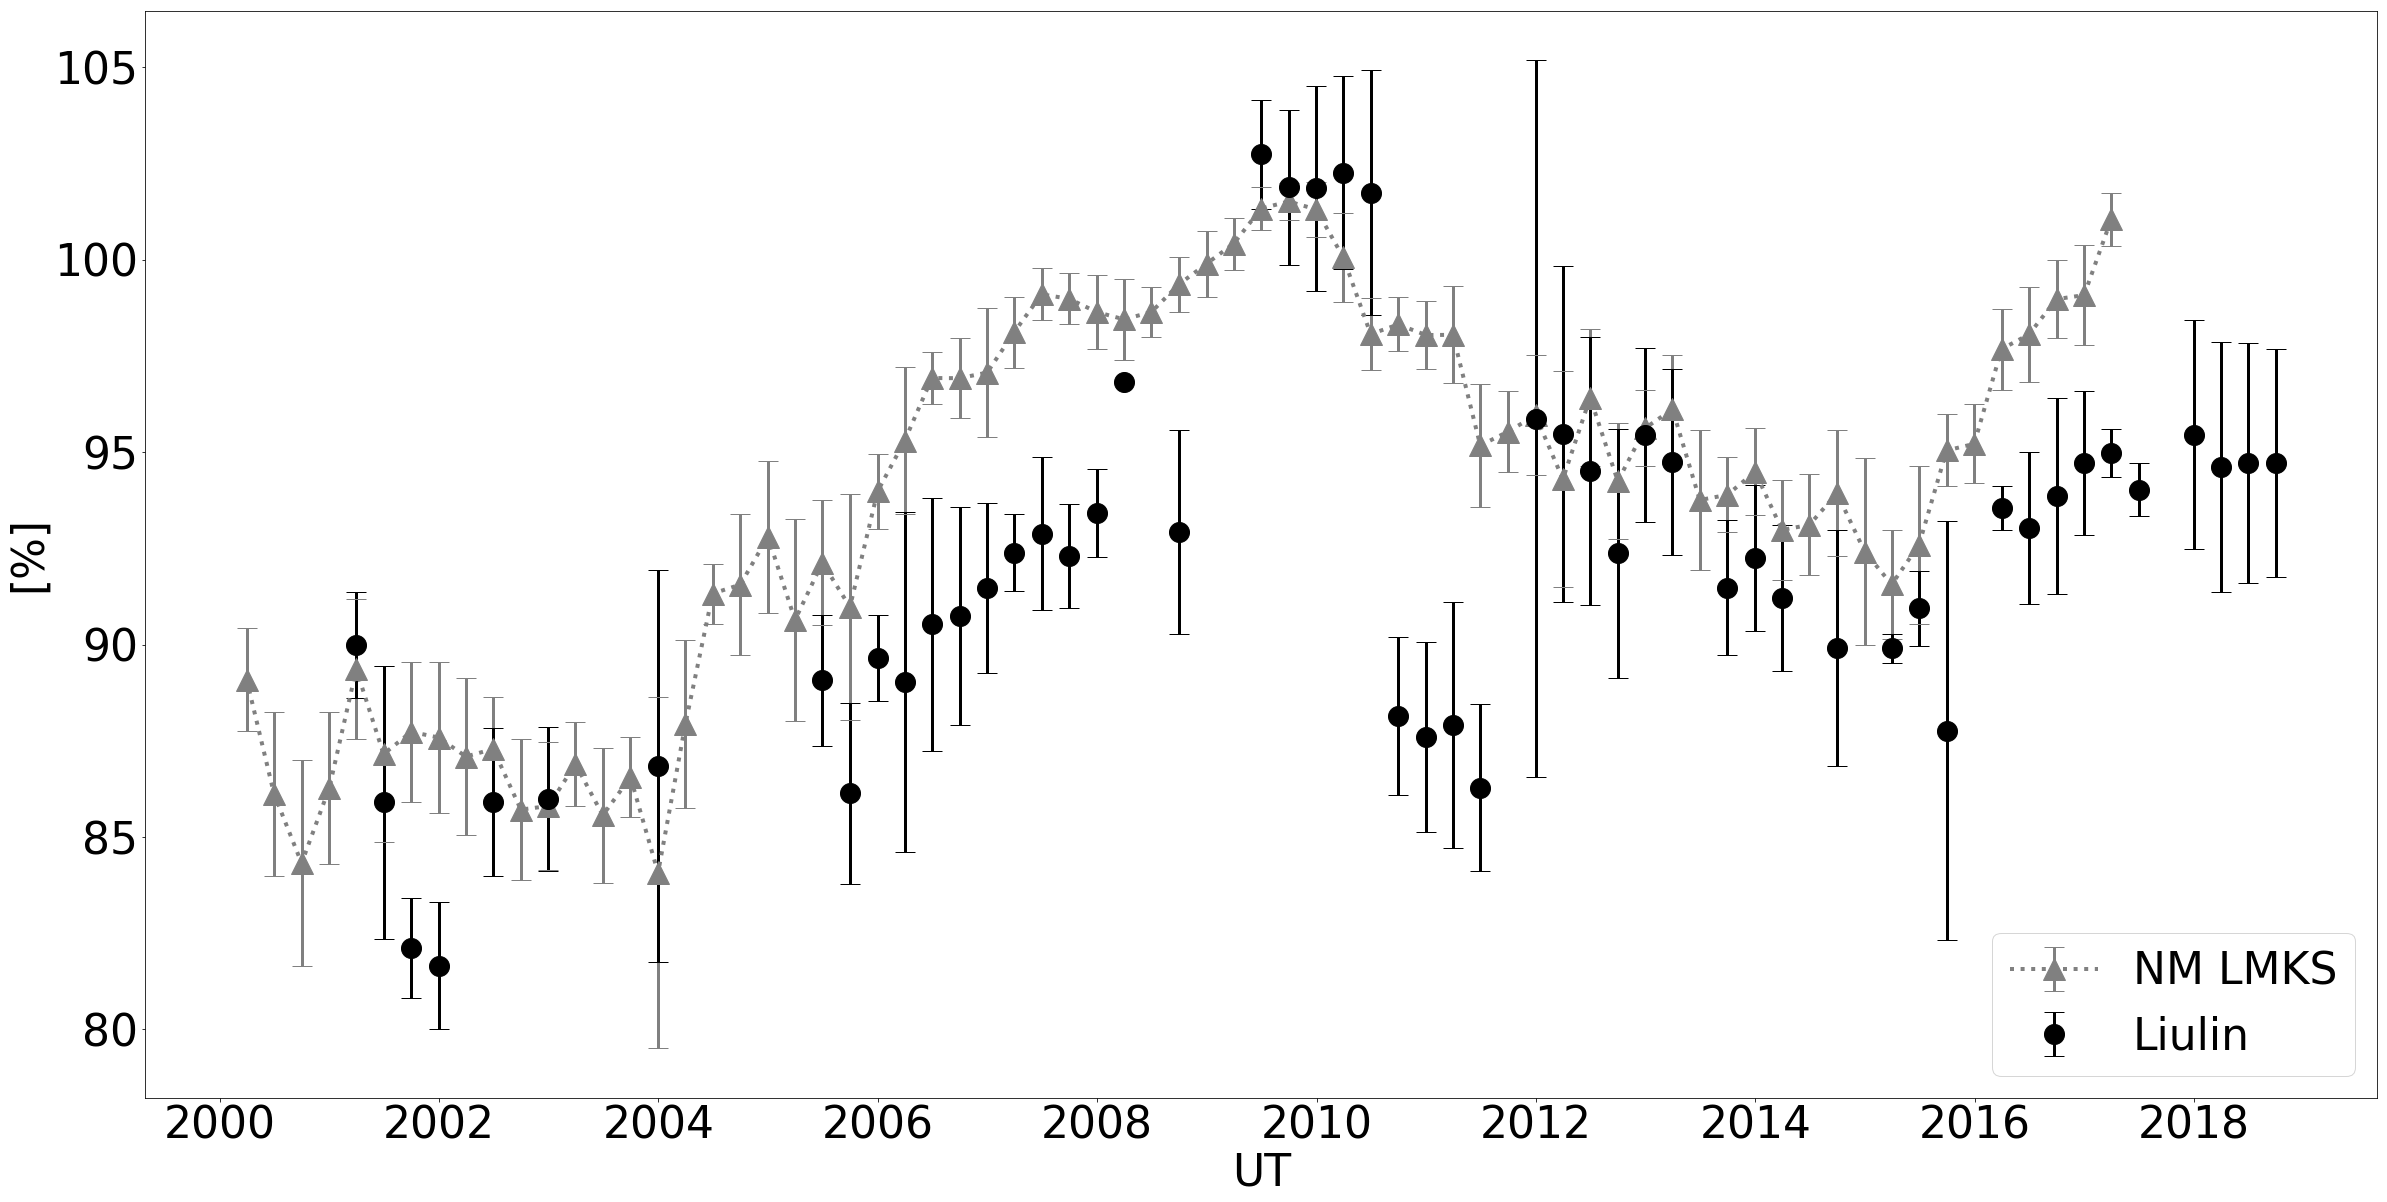

In [34]:
'''
B   business day frequency
C   custom business day frequency (experimental)
D   calendar day frequency
W   weekly frequency
M   month end frequency
BM  business month end frequency
MS  month start frequency
BMS business month start frequency
Q   quarter end frequency
BQ  business quarter endfrequency
QS  quarter start frequency
BQS business quarter start frequency
A   year end frequency
BA  business year end frequency
AS  year start frequency
BAS business year start frequency
H   hourly frequency
T   minutely frequency
S   secondly frequency
L   milliseconds
U   microseconds
'''

plt.figure(figsize=(20, 10))
matplotlib.rcParams.update({'font.size': 22})

FD = '2001-4-12'
#FD = '2012-9-4'
#FD = '2007-6-22'
#FD = '2008-8-22'
#FD = '2005-9-10'
#FD = '2015-8-4'

days_view = 20000

plt.figure(figsize=(40, 20))
matplotlib.rcParams.update({'font.size': 44})

df3 = pd.read_csv('./LSradiation.csv', sep=',', header=0, parse_dates=['time'])
df3['time'] = pd.to_datetime(df3['time'])
df3 = df3.set_index('time')
df3 = df3.sort_index()

df2 = pd.read_csv('./radiation_avg.csv', sep=',', header=0, parse_dates=['date'] )
df2['date'] = pd.to_datetime(df2['date'])
df2 = df2.set_index('date')

#df2 = df2.loc[df2['counter']>30] # filter for long flights

datetime.timedelta(days=1)
from_time = str(pd.to_datetime(FD) + datetime.timedelta(days=-days_view))
to_time = str(pd.to_datetime(FD) + datetime.timedelta(days=days_view))

# Neutron monitor
# The percentages are normalized to 100 % level reached in September 1986 and represented 1,745.200 counts per hour. 
df33 = df3.resample('Q').mean()
df333 = df3.resample('Q').std()

#plt.plot(df3[from_time: to_time].index,df3[from_time: to_time]['FD'],color='grey',label='NM LMKS')
plt.errorbar(df33[from_time: to_time].index,df33[from_time: to_time]['FD'],df333[from_time: to_time]['FD'],color='grey',lw=4, markersize=22, marker='^',linestyle=':',capsize=10,elinewidth=3,label='NM LMKS')
#plt.errorbar(df33[from_time: to_time].index,df33[from_time: to_time]['FD'],df333[from_time: to_time]['FD'], lw=3)

#Liulin
df2['c'] = df2['count'] / (3.1/100)
df2 = df2.loc[df2['c']<110]
#df2 = df2.loc[df2['alt']>34000]


df22 = df2.resample('Q').mean()
df222 = df2.resample('Q').std()

#df4 = df4.loc['2010-07-01':'2011-07-01']
#df5 = df5.loc['2010-07-01':'2011-07-01']

plt.errorbar(df22[from_time: to_time].index,df22[from_time: to_time]['c'], yerr=df222[from_time: to_time]['c'],color='black', lw=5, markersize=40,marker='.',linestyle='',capsize=10,elinewidth=3,label='Liulin')
#plt.ylim(70,110)
#plt.annotate('s', (matplotlib.dates.date2num(df2[from_time: to_time].index.to_pydatetime()), df2[from_time: to_time]['c'].tolist()))
#plt.plot(df5[from_time: to_time].index,df5[from_time: to_time]['c'],lw='1', markersize=10,marker='o',linestyle=':',label='Liulin')
#plt.errorbar(x, y, xerr=0.2, yerr=0.4)

plt.ylabel('[%]') # Y axis label
plt.xlabel('UT') # X axis label
plt.legend(loc=4)



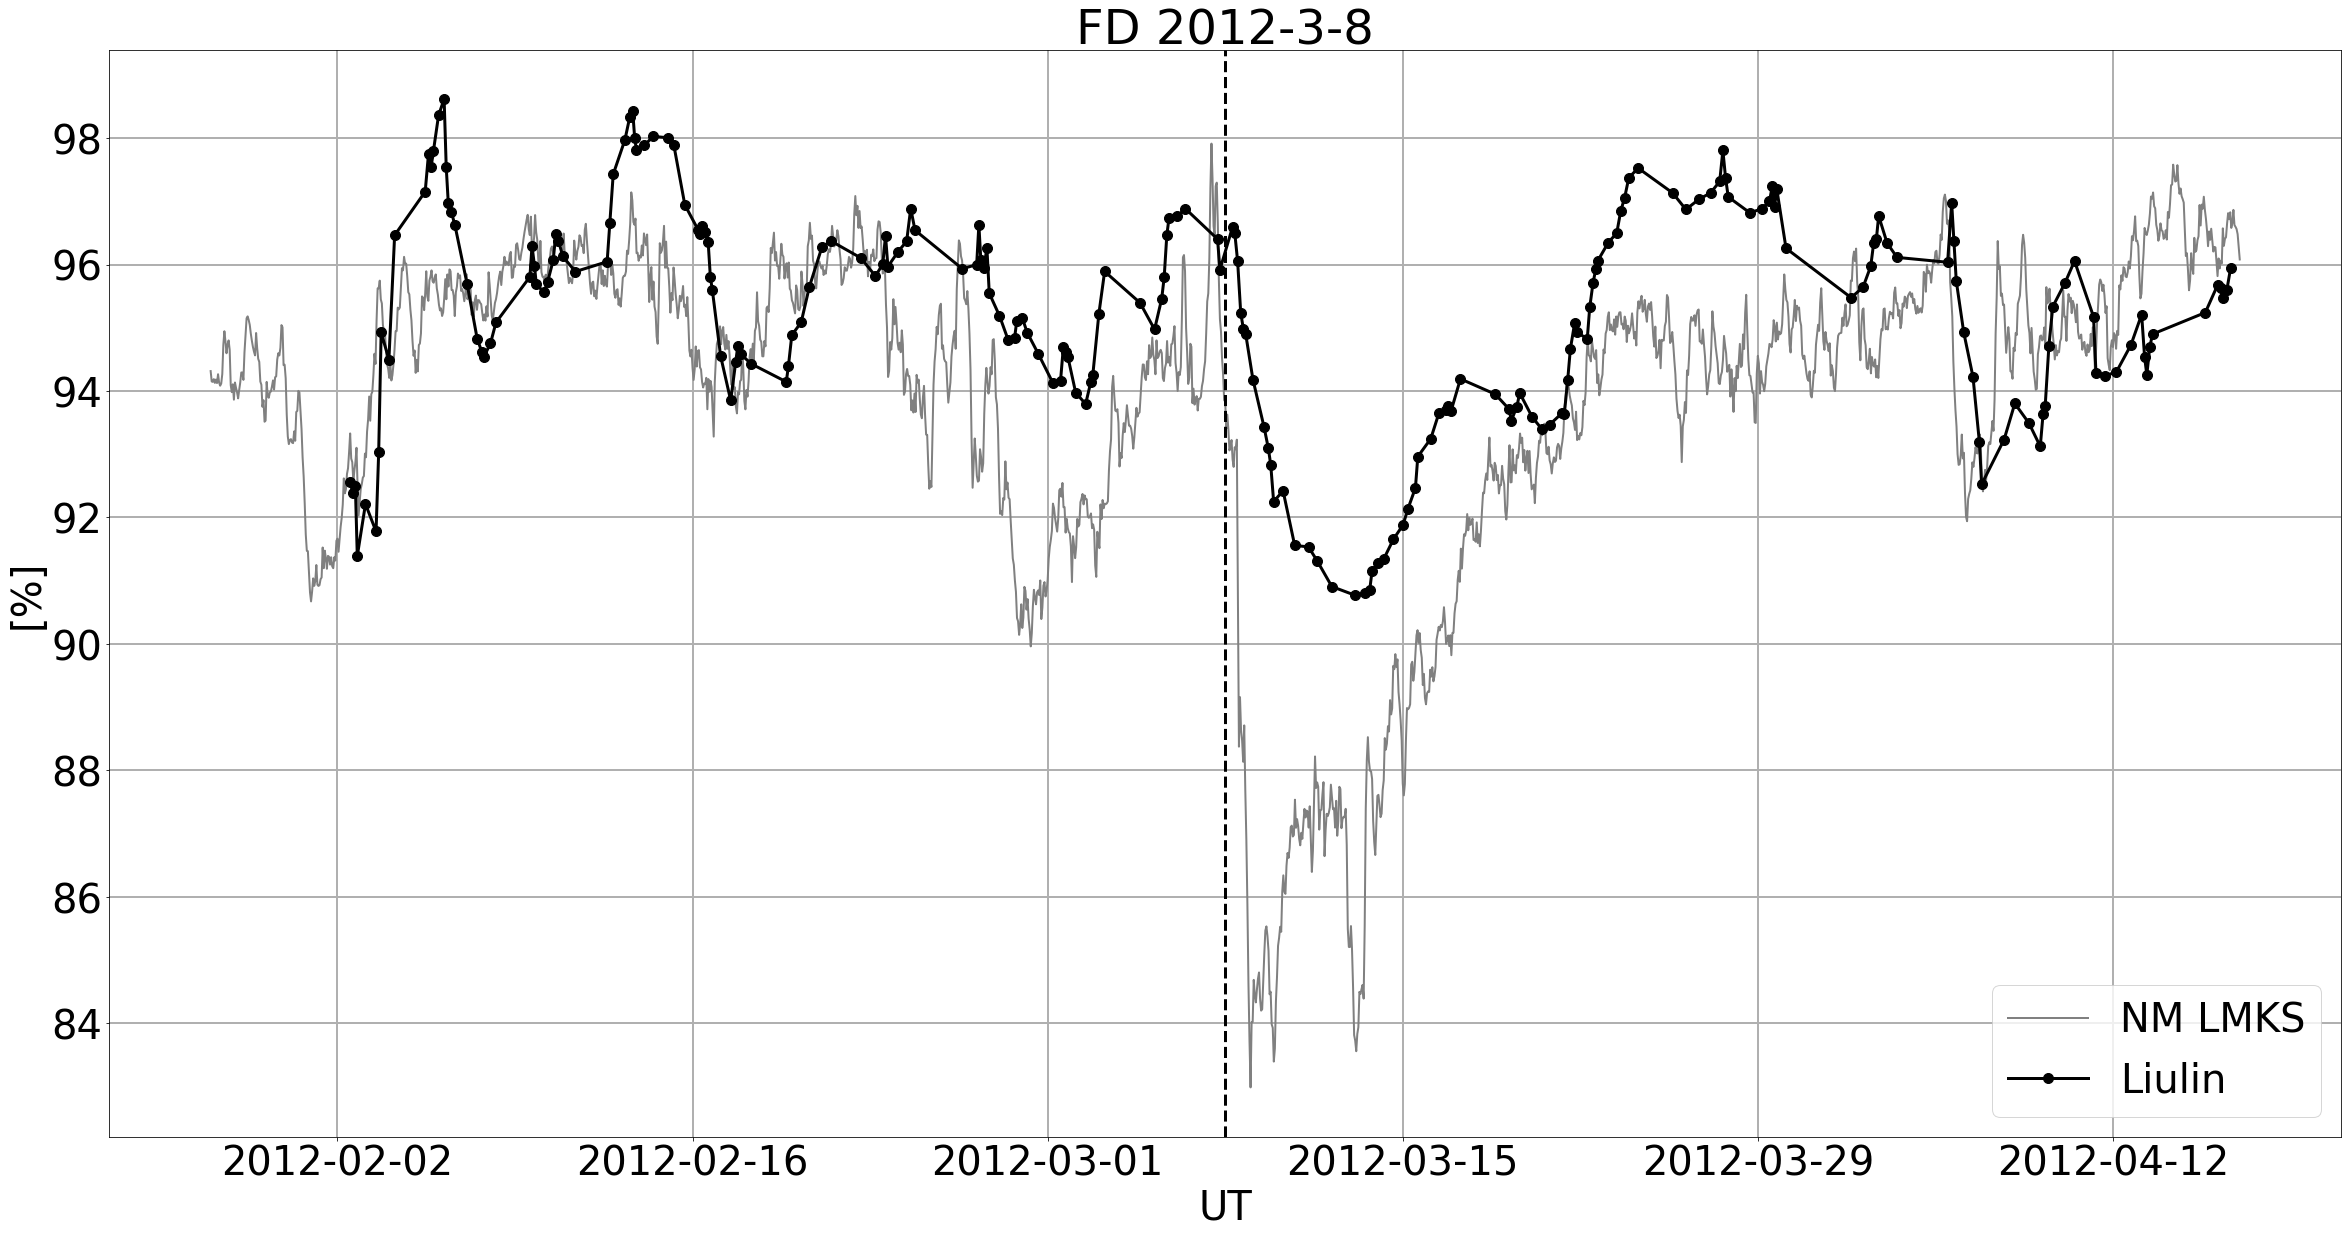

In [26]:
FD = '2001-4-12'
#FD = '2012-9-4'
#FD = '2007-6-22'
#FD = '2008-8-22'
#FD = '2005-9-10'
FD = '2012-3-8'

days_view = 40

#plt.figure(figsize=(20, 10))
plt.figure(figsize=(40, 20))
matplotlib.rcParams.update({'font.size': 40})

df3 = pd.read_csv('./LSradiation.csv', sep=',', header=0)#, parse_dates='time')
df3['time'] = pd.to_datetime(df3['time'])
df3 = df3.set_index('time')
df3 = df3.sort_index()

df2 = pd.read_csv('./radiation_avg.csv', sep=',', header=0)#, parse_dates='time' )
df2['date'] = pd.to_datetime(df2['date'])
df2 = df2.set_index('date')

#df2 = df2.loc[df2['counter']>30] # filter for short flights

datetime.timedelta(days=1)
from_time = str(pd.to_datetime(FD) + datetime.timedelta(days=-days_view))
to_time = str(pd.to_datetime(FD) + datetime.timedelta(days=days_view))

df2['c'] = df2['count'] / (3.1/100)
df2 = df2.loc[df2['c']<110]

#df2 = df2.resample('24 H', how='median', base=0)
WINDOW = 10
df2['c'] = df2['c'].rolling(WINDOW).mean()

# Neutron monitor
# The percentages are normalized to 100 % level reached in September 1986 and represented 1,745.200 counts per hour. 
plt.plot(df3[from_time: to_time].index,df3[from_time: to_time]['FD'],lw='2',color='grey',label='NM LMKS')
plt.title('FD ' + FD) 

#plt.twinx()

plt.plot(df2[from_time: to_time].index,df2[from_time: to_time]['c'], lw='3',color='black',marker='.', markersize=20,label='Liulin')
#!!! plt.plot(df2[from_time: to_time].index,df2[from_time: to_time]['c'],lw='1', markersize=20,marker='.',linestyle=':',label='Liulin')
#plt.ylim(1.5,3.2)
#plt.annotate('s', (matplotlib.dates.date2num(df2[from_time: to_time].index.to_pydatetime()), df2[from_time: to_time]['c'].tolist()))

plt.axvline(x=pd.to_datetime(FD), color='black', lw=3,ls='--') # plot dashed vertical line at the FD time

plt.ylabel('[%]') # Y axis label
plt.xlabel('UT') # X axis label
plt.legend(loc=4)
plt.grid(lw='2')
